In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### EDA

In [4]:
data=pd.read_csv('data/taxi_trip_pricing.csv')
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [8]:
data.dtypes

Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [10]:
data.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [16]:
mean_trip_price = data['Trip_Price'].mean()
data['Trip_Price'].fillna(mean_trip_price, inplace=True)

data['Base_Fare'].fillna(data['Base_Fare'].mean(), inplace=True)
data['Per_Km_Rate'].fillna(data['Per_Km_Rate'].mean(), inplace=True)
data['Per_Minute_Rate'].fillna(data['Per_Minute_Rate'].mean(), inplace=True)
data['Trip_Duration_Minutes'].fillna(data['Trip_Duration_Minutes'].mean(), inplace=True)


data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0], inplace=True)
data['Day_of_Week'].fillna(data['Day_of_Week'].mode()[0], inplace=True)
data['Traffic_Conditions'].fillna(data['Traffic_Conditions'].mode()[0], inplace=True)
data['Weather'].fillna(data['Weather'].mode()[0], inplace=True)

data['Trip_Distance_km'].fillna(data['Trip_Distance_km'].mean(), inplace=True)
data['Passenger_Count'].fillna(data['Passenger_Count'].mean(), inplace=True)

In [18]:
data.isna().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [20]:
data.duplicated().sum()

0

In [22]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000


In [30]:
data = pd.get_dummies(data, drop_first=True)
data=data.astype(int)

In [32]:
data.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19,3,3,0,0,53,36,0,1,0,0,1,0,0,0
1,47,1,3,0,0,40,56,0,0,0,0,0,0,0,0
2,36,1,2,1,0,37,52,1,0,0,1,0,0,0,0
3,30,4,3,0,0,116,36,1,0,0,0,1,0,0,0
4,27,3,2,0,0,22,15,1,0,0,0,0,0,0,0


### Outlier handling

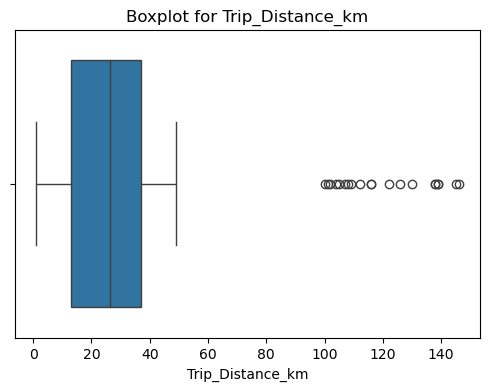

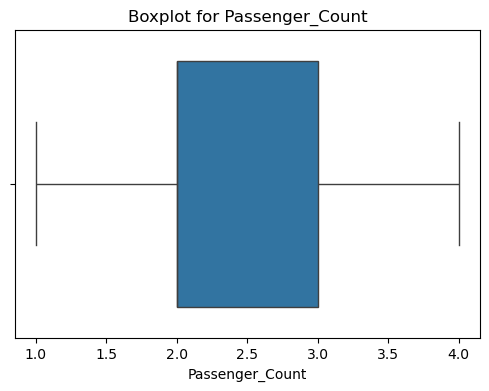

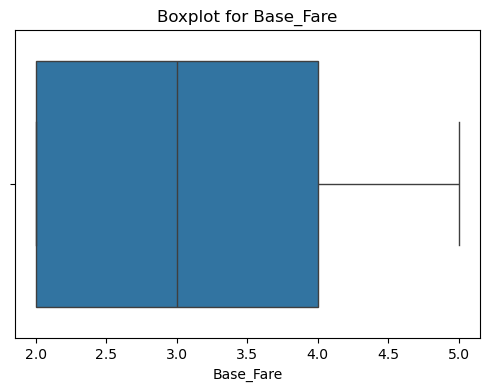

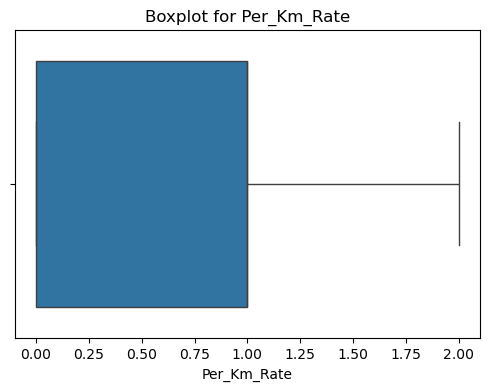

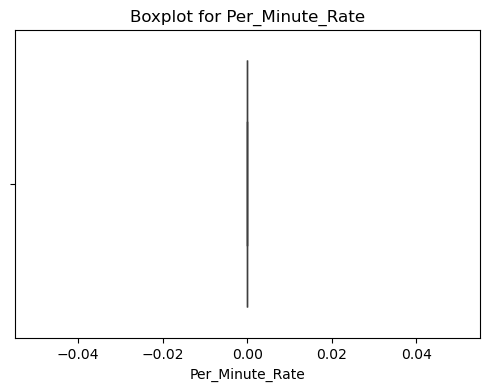

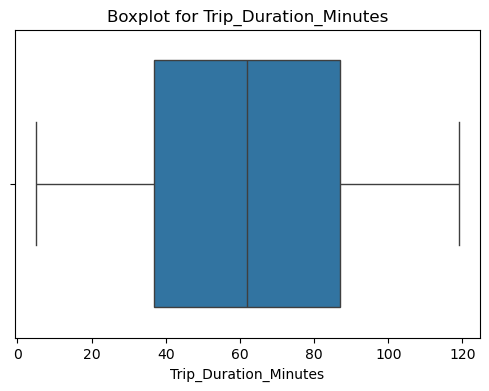

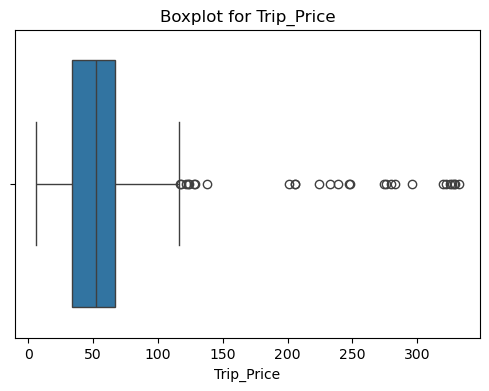

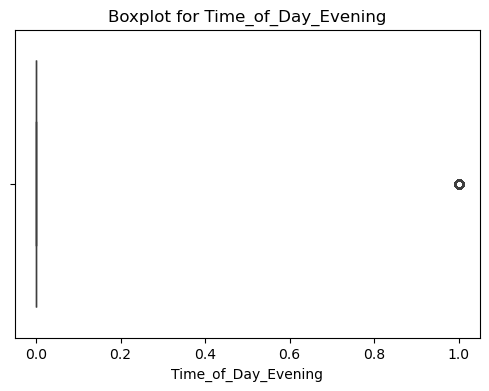

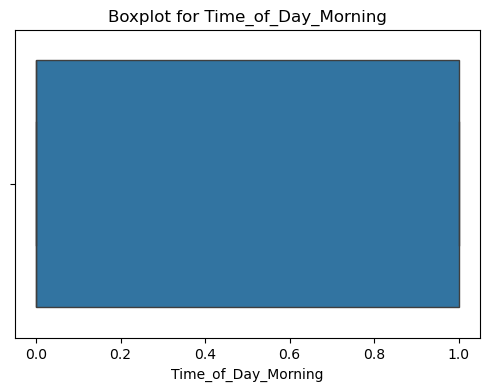

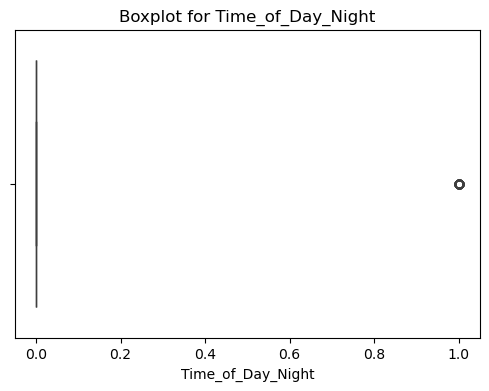

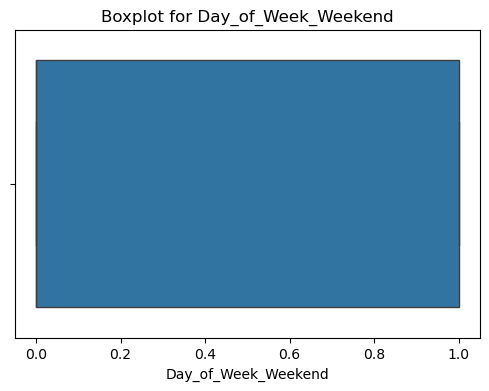

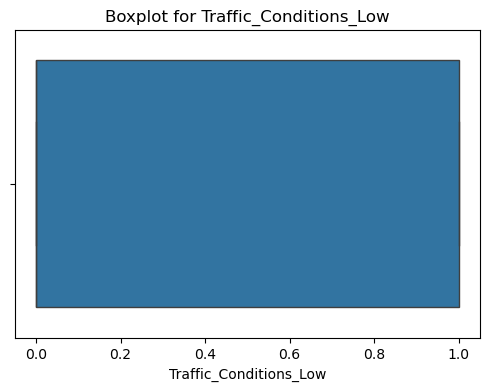

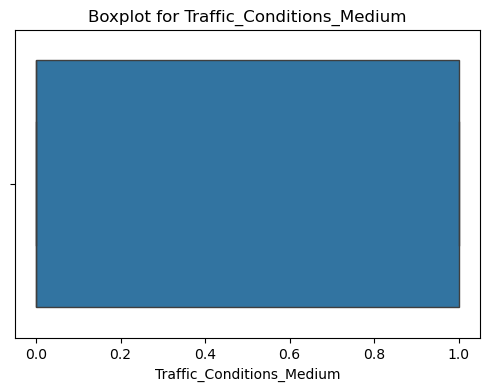

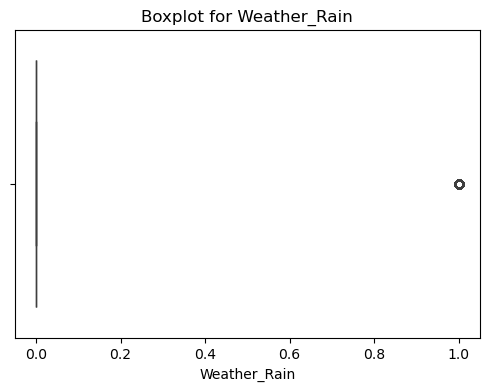

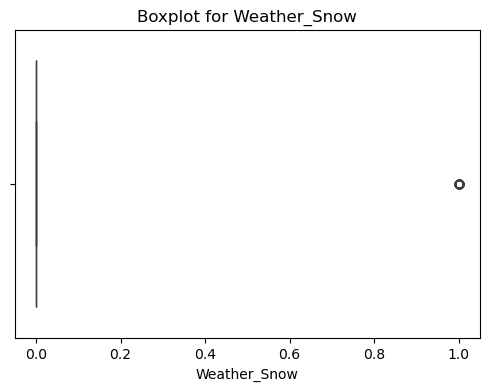

In [35]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [37]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                19                3          3            0                0   
1                47                1          3            0                0   
2                36                1          2            1                0   
3                30                4          3            0                0   
4                27                3          2            0                0   

   Trip_Duration_Minutes  Trip_Price  Time_of_Day_Evening  \
0                     53        36.0                    0   
1                     40        56.0                    0   
2                     37        52.0                    0   
3                    116        36.0                    0   
4                     22        15.0                    0   

   Time_of_Day_Morning  Time_of_Day_Night  Day_of_Week_Weekend  \
0                    1                  0                    0   
1             

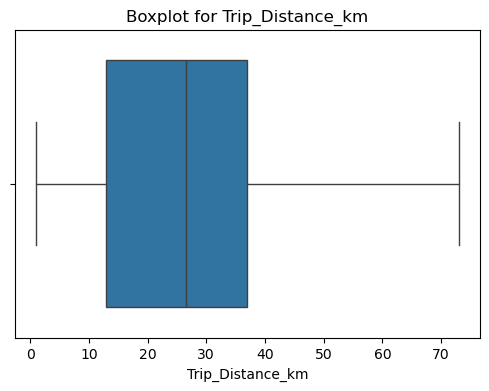

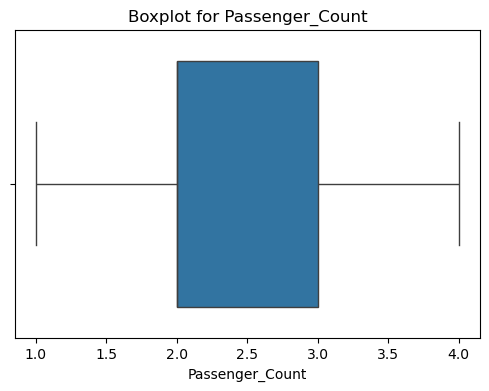

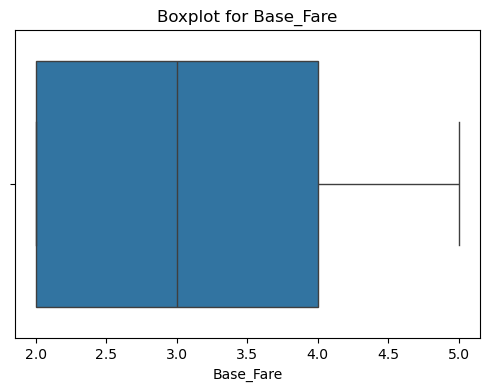

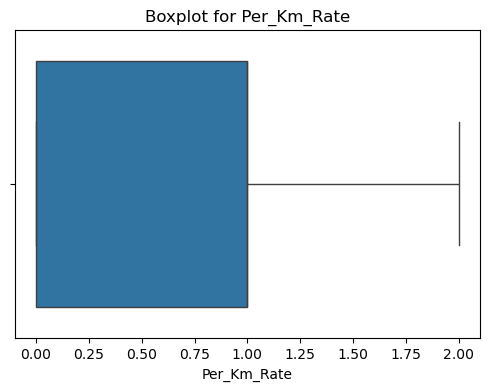

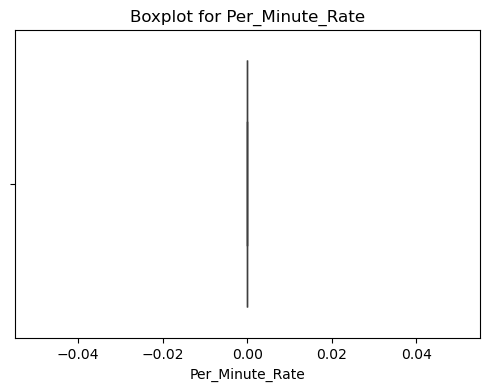

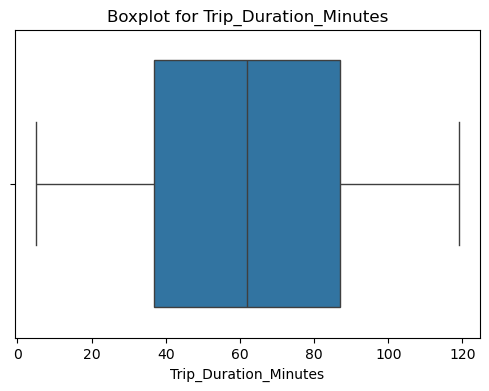

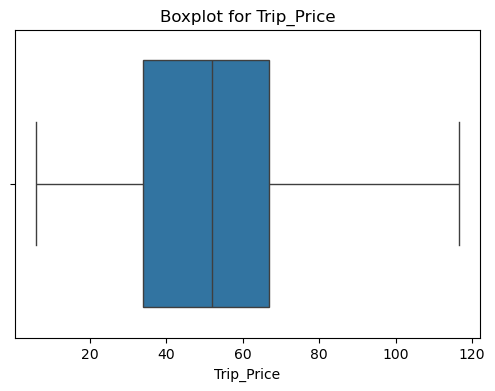

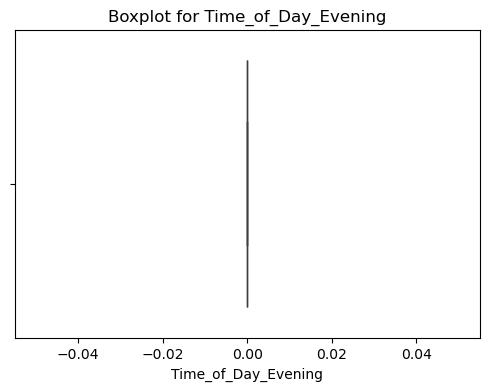

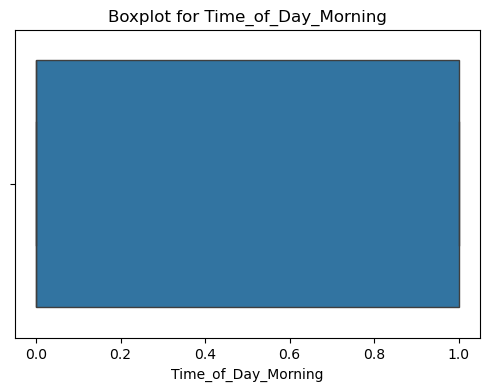

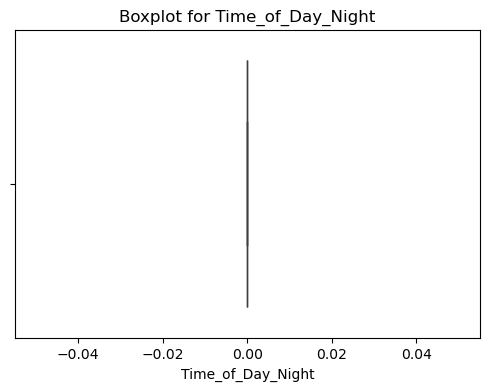

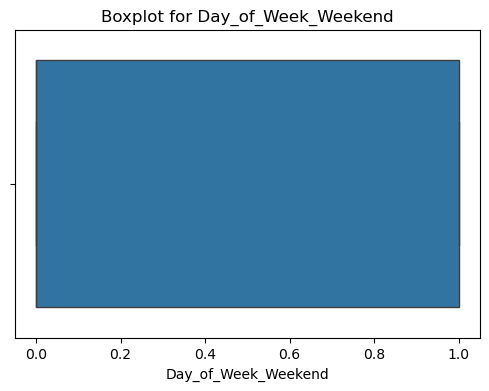

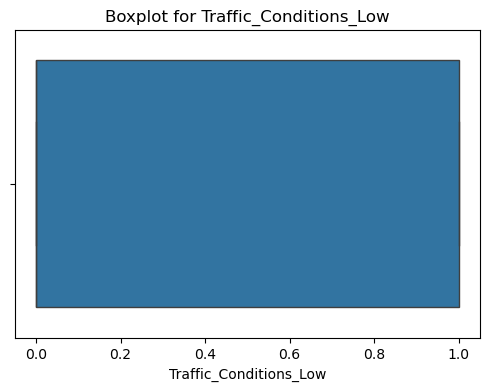

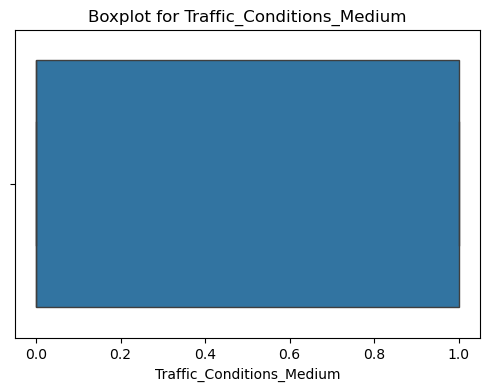

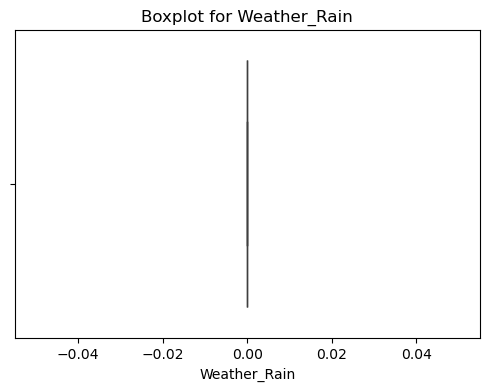

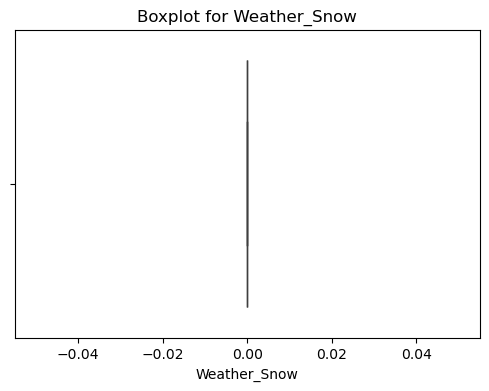

In [39]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Splitting data

In [42]:
X = data.drop(columns=['Trip_Price'])
y = data['Trip_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [49]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=47, random_state=34),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42, max_depth=5),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='linear')
}

for name, reg in regressors.items():
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # print(f'{name} Mean Squared Error: {mse:.2f}')
    print(f'{name} R^2 Score: {r2:.2f}\n')
    
    # Accuracy on train data
    train_score = reg.score(X_train_scaled, y_train)
    
    # Accuracy on test data
    test_score = reg.score(X_test_scaled, y_test)
    
    print(f'{name} - Train Accuracy: {train_score:.2f}, Test Accuracy: {test_score:.2f}')

Linear Regression R^2 Score: 0.70

Linear Regression - Train Accuracy: 0.73, Test Accuracy: 0.70
Random Forest Regressor R^2 Score: 0.67

Random Forest Regressor - Train Accuracy: 0.96, Test Accuracy: 0.67
Decision Tree Regressor R^2 Score: 0.68

Decision Tree Regressor - Train Accuracy: 0.74, Test Accuracy: 0.68
KNN Regressor R^2 Score: 0.60

KNN Regressor - Train Accuracy: 0.71, Test Accuracy: 0.60
SVR R^2 Score: 0.69

SVR - Train Accuracy: 0.73, Test Accuracy: 0.69


In [47]:
#END